In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [174]:
df = pd.read_csv(r"C:\Users\ShibuKumar\Downloads\Datas\Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [175]:
x=df.iloc[:,[3,4]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [176]:
from sklearn.cluster import KMeans

In [177]:
#we calculate WCSS
wcss=[]
for i in range(1,20):
    kmean=KMeans(n_clusters=i, init="k-means++",random_state=30)
    kmean.fit(x)
    wcss.append(kmean.inertia_)

wcss

[269981.28,
 184609.9843409062,
 106348.37306211119,
 82472.19413919414,
 44448.45544793371,
 37455.98455516028,
 32277.023173884936,
 30659.650406115627,
 23770.116981207204,
 21775.646081111874,
 19290.20758904838,
 17827.131139773017,
 14971.026961342752,
 14294.932338421813,
 13018.938471177946,
 11867.359683299157,
 10369.09301663249,
 9907.693183716869,
 9504.620167843852]

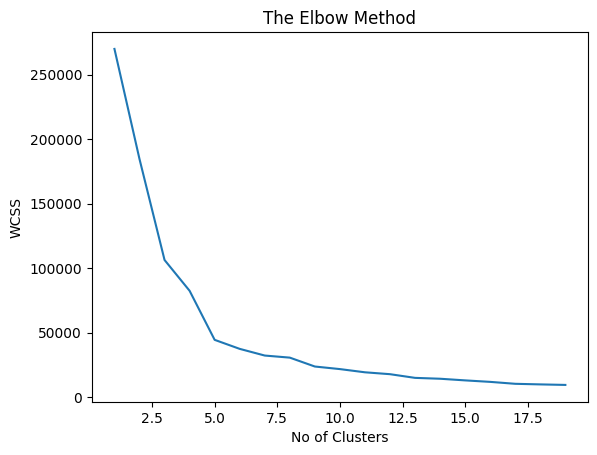

In [178]:
#find the k values
plt.plot(range(1,20),wcss)
plt.title("The Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

In [179]:
#In this fig, k=5
cluster=KMeans(n_clusters=3,init="k-means++",random_state=30)

In [182]:
kmean.fit(x)

KMeans(n_clusters=19, random_state=30)

In [181]:
cluster_labels=kmean.fit_predict(x)
cluster_labels

array([12, 11,  3, 11, 12, 11,  3,  4,  3, 11,  3,  4,  3, 11,  3, 11, 12,
       11, 12,  4, 12, 11,  3, 11, 18, 11, 12, 11, 12,  4, 18, 11, 18,  4,
       18, 11, 18, 11, 18, 11, 13,  4, 13,  1, 13,  1,  1, 13, 13, 13,  1,
        1,  1,  1, 13, 13,  1, 13,  1,  5,  1,  1,  1,  1,  5,  1,  5,  5,
        1,  5,  1,  5,  5,  1,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  7,
        5,  7,  7,  7,  5,  7,  9,  7,  9,  9,  7,  7,  7,  9,  7,  9,  7,
        7,  7,  7,  9,  7,  9,  9,  7,  7,  7,  9,  9,  7,  7,  9,  7,  9,
        7,  7,  9,  7, 14, 15, 10,  9, 14,  0, 10,  0, 10,  9, 10,  0, 14,
        0, 10,  0, 10,  0, 14,  9, 14,  0, 14, 15, 10, 15, 14, 15, 14, 15,
       10, 15, 14,  0, 10,  0, 10, 15, 14,  0, 14, 15, 10, 17,  2, 15, 10,
       17, 10, 17,  2, 17,  2, 17, 10, 17,  2,  6,  2, 17,  2,  6,  2,  6,
        8,  6,  2,  6,  8, 16,  8, 16,  8, 16,  8, 16,  8])

In [183]:
# X=x.values
# from sklearn.metrics import silhouette_samples
# import matplotlib.cm as cm
# range_n_clusters = [2, 3, 4, 5, 6,]
# for n_clusters in range_n_clusters:
#     # Create a subplot with 1 row and 2 columns
#     fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.set_size_inches(18, 7)

#     # The 1st subplot is the silhouette plot
#     # The silhouette coefficient can range from -1, 1 but in this example all
#     # lie within [-0.1, 1]
#     ax1.set_xlim([-0.1, 1])
#     # The (n_clusters+1)*10 is for inserting blank space between silhouette
#     # plots of individual clusters, to demarcate them clearly.
#     ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

#     # Initialize the clusterer with n_clusters value and a random generator
#     # seed of 10 for reproducibility.
#     clusterer = KMeans(n_clusters=n_clusters, random_state=10)
#     cluster_labels = clusterer.fit_predict(X)

#     # The silhouette_score gives the average value for all the samples.
#     # This gives a perspective into the density and separation of the formed
#     # clusters
#     silhouette_avg = silhouette_score(X, cluster_labels)
#     print(
#         "For n_clusters =",
#         n_clusters,
#         "The average silhouette_score is :",
#         silhouette_avg,
#     )

#     # Compute the silhouette scores for each sample
#     sample_silhouette_values = silhouette_samples(X, cluster_labels)

#     y_lower = 10
#     for i in range(n_clusters):
#         # Aggregate the silhouette scores for samples belonging to
#         # cluster i, and sort them
#         ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

#         ith_cluster_silhouette_values.sort()

#         size_cluster_i = ith_cluster_silhouette_values.shape[0]
#         y_upper = y_lower + size_cluster_i

#         color = cm.nipy_spectral(float(i) / n_clusters)
#         ax1.fill_betweenx(
#             np.arange(y_lower, y_upper),
#             0,
#             ith_cluster_silhouette_values,
#             facecolor=color,
#             edgecolor=color,
#             alpha=0.7,
#         )

#         # Label the silhouette plots with their cluster numbers at the middle
#         ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

#         # Compute the new y_lower for next plot
#         y_lower = y_upper + 10  # 10 for the 0 samples

#     ax1.set_title("The silhouette plot for the various clusters.")
#     ax1.set_xlabel("The silhouette coefficient values")
#     ax1.set_ylabel("Cluster label")

#     # The vertical line for average silhouette score of all the values
#     ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

#     ax1.set_yticks([])  # Clear the yaxis labels / ticks
#     ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#     # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(
#         X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
#     )

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(
#         centers[:, 0],
#         centers[:, 1],
#         marker="o",
#         c="white",
#         alpha=1,
#         s=200,
#         edgecolor="k",
#     )

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

#     plt.suptitle(
#         "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
#         % n_clusters,
#         fontsize=14,
#         fontweight="bold",
#     )

# plt.show()

In [157]:
x.values

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [158]:
#5is cluster number, 1 is j or column value
x.values[y_means==3,1]

array([91, 77, 95, 75, 75, 71, 88, 73, 72, 93, 87, 97, 74, 90, 88, 76, 89,
       78, 73, 83, 93, 75, 95, 63, 75, 92, 86, 69, 90, 86, 88, 97, 68, 85,
       69, 91, 79, 74, 83], dtype=int64)

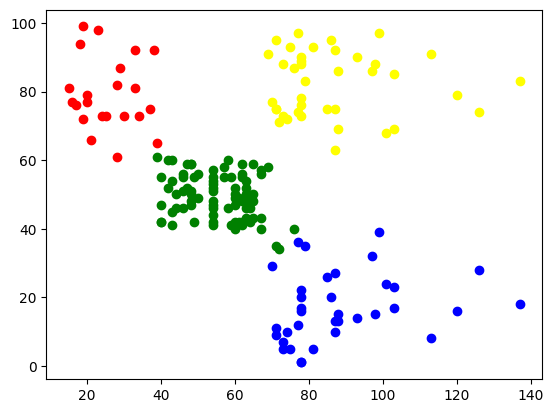

In [159]:
plt.scatter(x.values[y_means==0,0],x.values[y_means==0,1],color="blue")
plt.scatter(x.values[y_means==1,0],x.values[y_means==1,1],color="red")
plt.scatter(x.values[y_means==2,0],x.values[y_means==2,1],color="green")
plt.scatter(x.values[y_means==3,0],x.values[y_means==3,1],color="yellow")

In [161]:
from sklearn.metrics import silhouette_score
silhouette_score(x,cluster_labels)

0.404046651317813

#K-Means on 3-D Data

In [127]:
from sklearn.datasets import make_blobs

In [128]:
centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std=[1,1,1,1]

x,y=make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [129]:
x

array([[ 4.33424548,  3.32580419, -4.17497018],
       [-3.32246719,  3.22171129, -4.625342  ],
       [-6.07296862, -4.13459237,  2.6984613 ],
       [ 6.90465871,  6.1110567 , -4.3409502 ],
       [-2.60839207,  2.95015551, -2.2346649 ],
       [ 5.88490881,  4.12271848, -5.86778722],
       [-4.68484061, -4.15383935,  4.14048406],
       [-1.82542929,  3.96089238, -3.4075272 ],
       [-5.34385368, -4.95640314,  4.37999916],
       [ 4.91549197,  4.70263812, -4.582698  ],
       [-3.80108212, -4.81484358,  4.62471505],
       [ 4.6735005 ,  3.65732421, -3.88561702],
       [-6.23005814, -4.4494625 ,  5.79280687],
       [-3.90232915,  2.95112294, -4.6949209 ],
       [ 3.72744124,  5.31354772, -4.49681519],
       [-3.3088472 ,  3.05743945, -3.81896126],
       [ 2.70273021, -2.21732429,  3.17390257],
       [ 4.06438286, -0.36217193,  3.214466  ],
       [ 4.69268607, -2.73794194,  5.15528789],
       [ 4.1210827 , -1.5438783 ,  3.29415949],
       [-6.61577235, -3.87858229,  5.408

In [130]:
import plotly.express as px
fig=px.scatter_3d(x=x[:,0],y=x[:,1],z=x[:,2])
fig.show()